In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2 as pg
import os
import pandas as pd
from sqlalchemy import create_engine
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import nltk
import numpy as np
import re

In [2]:
sns.set_style('whitegrid')
plt.rc('font', family='Arial')
plt.rc('font', size=8) 
plt.rc('axes', titlesize=8) 
plt.rc('axes', labelsize=8) 
plt.rc('xtick', labelsize=8) 
plt.rc('ytick', labelsize=8) 
plt.rc('legend', fontsize=8)
%config InlineBackend.figure_format = 'retina'

In [3]:
df = pd.read_csv('oal_dt_dataset.csv', nrows=1000000)

In [4]:
df.head()

doi     pm_grouptype                 type abstract  \
0  10.1001/2012.jama.10425  Journal_Article   research_discourse      NaN   
1  10.1001/2012.jama.10452  Journal_Article   research_discourse      NaN   
2  10.1001/2012.jama.10500             News  editorial_discourse      NaN   
3  10.1001/2012.jama.10931        Editorial  editorial_discourse      NaN   
4  10.1001/2012.jama.10939             News  editorial_discourse      NaN   

                                               title page  author_count  \
0                                A Path to Wholeness  985             4   
1                                            Worries  873             1   
2  Critics of US House Proposal to Ax AHRQ Say Id...  849             1   
3    Atherogenic Vascular Stiffness and Hypertension  919             1   
4  Lessons From Massachusetts: Cost Remains a Hur...  961             1   

   has_license  is_referenced_by_count  references_count  has_funder  
0            0                       1                 0           0  
1            0                       1                 0           0  
2            0                       0                 0           0  
3            0                      11                 0           0  
4            0                       1                 0           0

In [26]:
df.value_counts(subset=['type'], normalize=False, dropna=False)

type               
research_discourse     919150
editorial_discourse     79217
not assigned             1633
Name: count, dtype: int64

In [25]:
df.value_counts(subset=['type'], normalize=True, dropna=False)

type               
research_discourse     0.919150
editorial_discourse    0.079217
not assigned           0.001633
Name: proportion, dtype: float64

In [8]:
df.groupby(['type'])['author_count'].median()

type
editorial_discourse    3.0
not assigned           2.0
research_discourse     5.0
Name: author_count, dtype: float64

In [10]:
df.groupby(['type'])['author_count'].mean()

type
editorial_discourse    3.816087
not assigned           2.457440
research_discourse     6.404567
Name: author_count, dtype: float64

In [11]:
df.groupby(['type'])['author_count'].std()

type
editorial_discourse    14.364447
not assigned            4.126618
research_discourse     10.378191
Name: author_count, dtype: float64

In [15]:
df.groupby(['type'])['has_license'].mean()

type
editorial_discourse    0.877981
not assigned           0.946724
research_discourse     0.960025
Name: has_license, dtype: float64

In [16]:
df.groupby(['type'])['has_funder'].mean()

type
editorial_discourse    0.077837
not assigned           0.033068
research_discourse     0.406644
Name: has_funder, dtype: float64

In [17]:
df.groupby(['type'])['is_referenced_by_count'].median()

type
editorial_discourse     1.0
not assigned            1.0
research_discourse     11.0
Name: is_referenced_by_count, dtype: float64

In [18]:
df.groupby(['type'])['is_referenced_by_count'].mean()

type
editorial_discourse     4.185150
not assigned            4.270055
research_discourse     22.204891
Name: is_referenced_by_count, dtype: float64

In [19]:
df.groupby(['type'])['is_referenced_by_count'].std()

type
editorial_discourse    20.171089
not assigned           14.454796
research_discourse     55.688441
Name: is_referenced_by_count, dtype: float64

In [20]:
df.groupby(['type'])['references_count'].median()

type
editorial_discourse     5.0
not assigned            1.0
research_discourse     38.0
Name: references_count, dtype: float64

In [21]:
df.groupby(['type'])['references_count'].mean()

type
editorial_discourse     7.397099
not assigned           11.781996
research_discourse     45.425321
Name: references_count, dtype: float64

In [22]:
df.groupby(['type'])['references_count'].std()

type
editorial_discourse    11.715292
not assigned           23.460469
research_discourse     38.453860
Name: references_count, dtype: float64

In [40]:
def page_counter(page_str):
    page_int = 1
    if '-' in str(page_str):
        try:
            page_int = abs(eval(page_str))
        except:
            pass
        
    return page_int

In [41]:
df['page_count'] = df.page.apply(page_counter)

In [42]:
df.groupby(['type'])['page_count'].median()

type
editorial_discourse    1.0
not assigned           1.0
research_discourse     8.0
Name: page_count, dtype: float64

In [43]:
df.groupby(['type'])['page_count'].mean()

type
editorial_discourse    1.562518
not assigned           6.358236
research_discourse     7.853300
Name: page_count, dtype: float64

In [44]:
df.groupby(['type'])['page_count'].std()

type
editorial_discourse     5.812773
not assigned           27.130127
research_discourse      6.592493
Name: page_count, dtype: float64

In [18]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
remove_html = re.compile('<.*?>')

def lemmatize_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(remove_html, '', text)
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

df['title_lemmatized'] = df.title.apply(lemmatize_text)
df['abstract_lemmatized'] = df.abstract.apply(lemmatize_text)

In [19]:
def generate_wordcloud(data):
    cloud = WordCloud(width=700,
                      height=500,
                      max_words=150,
                      colormap='tab20c',
                      collocations=False).generate_from_text(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()

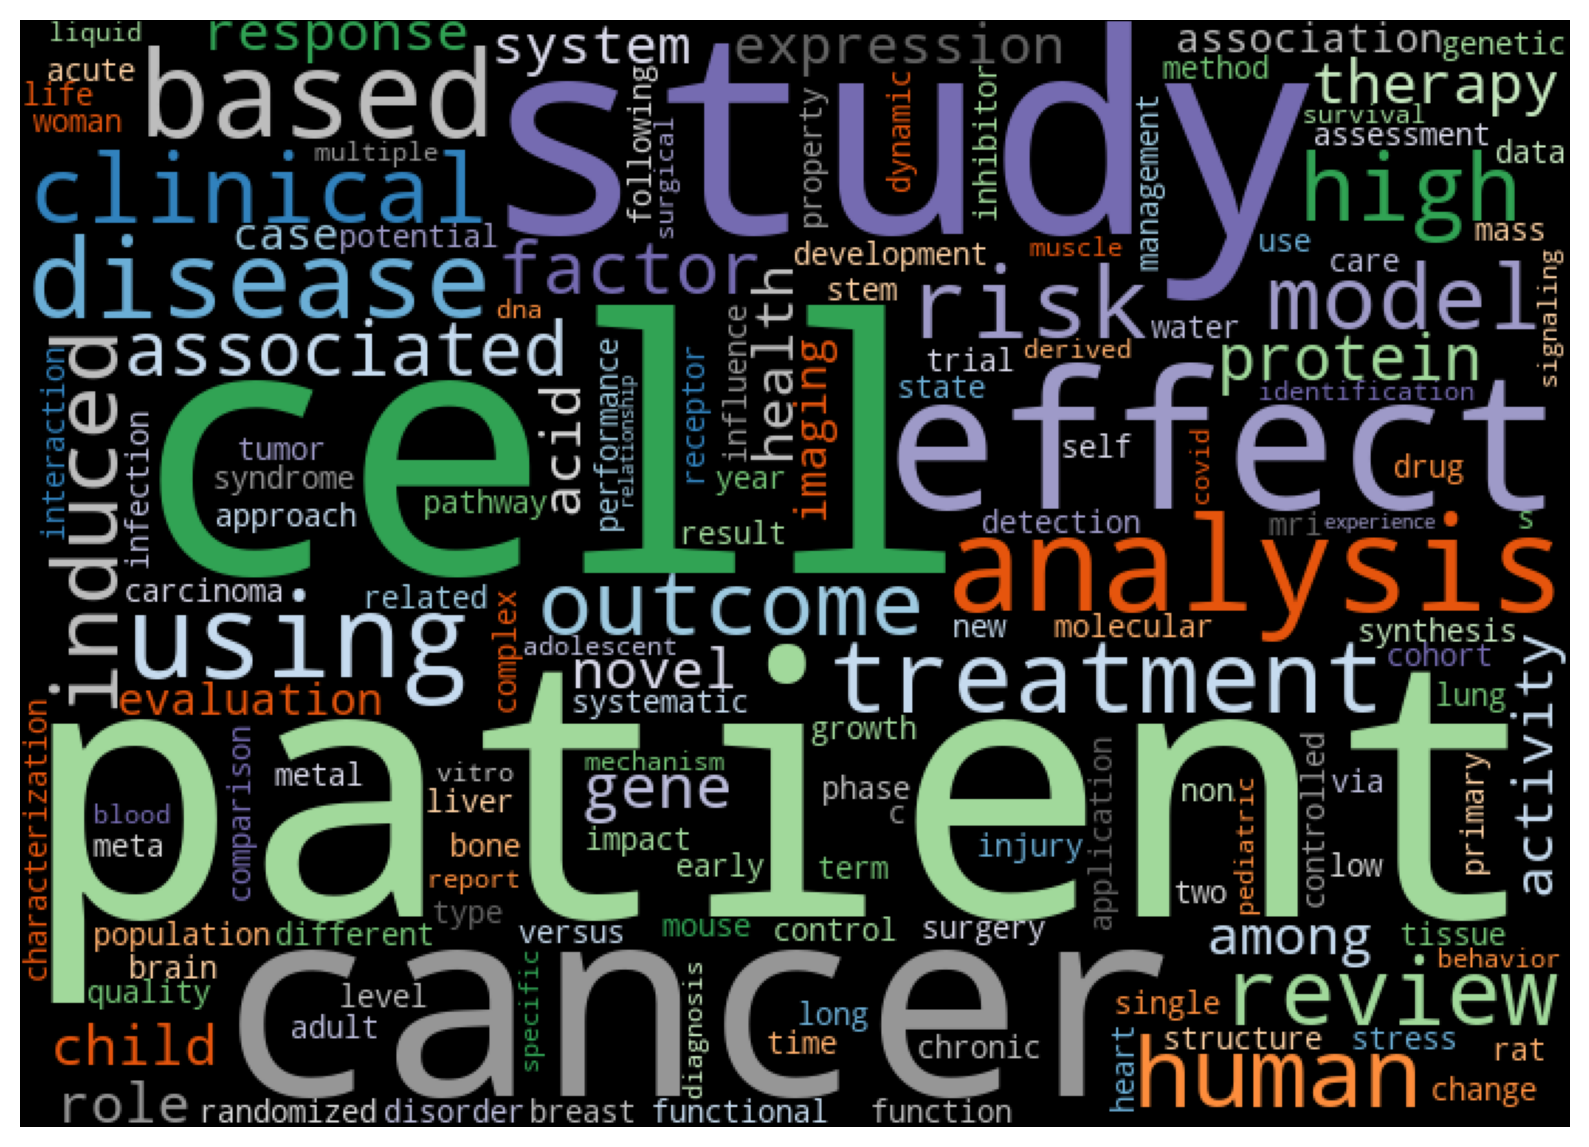

In [20]:
generate_wordcloud(' '.join(df[df.type == 'research_discourse']['title_lemmatized']))

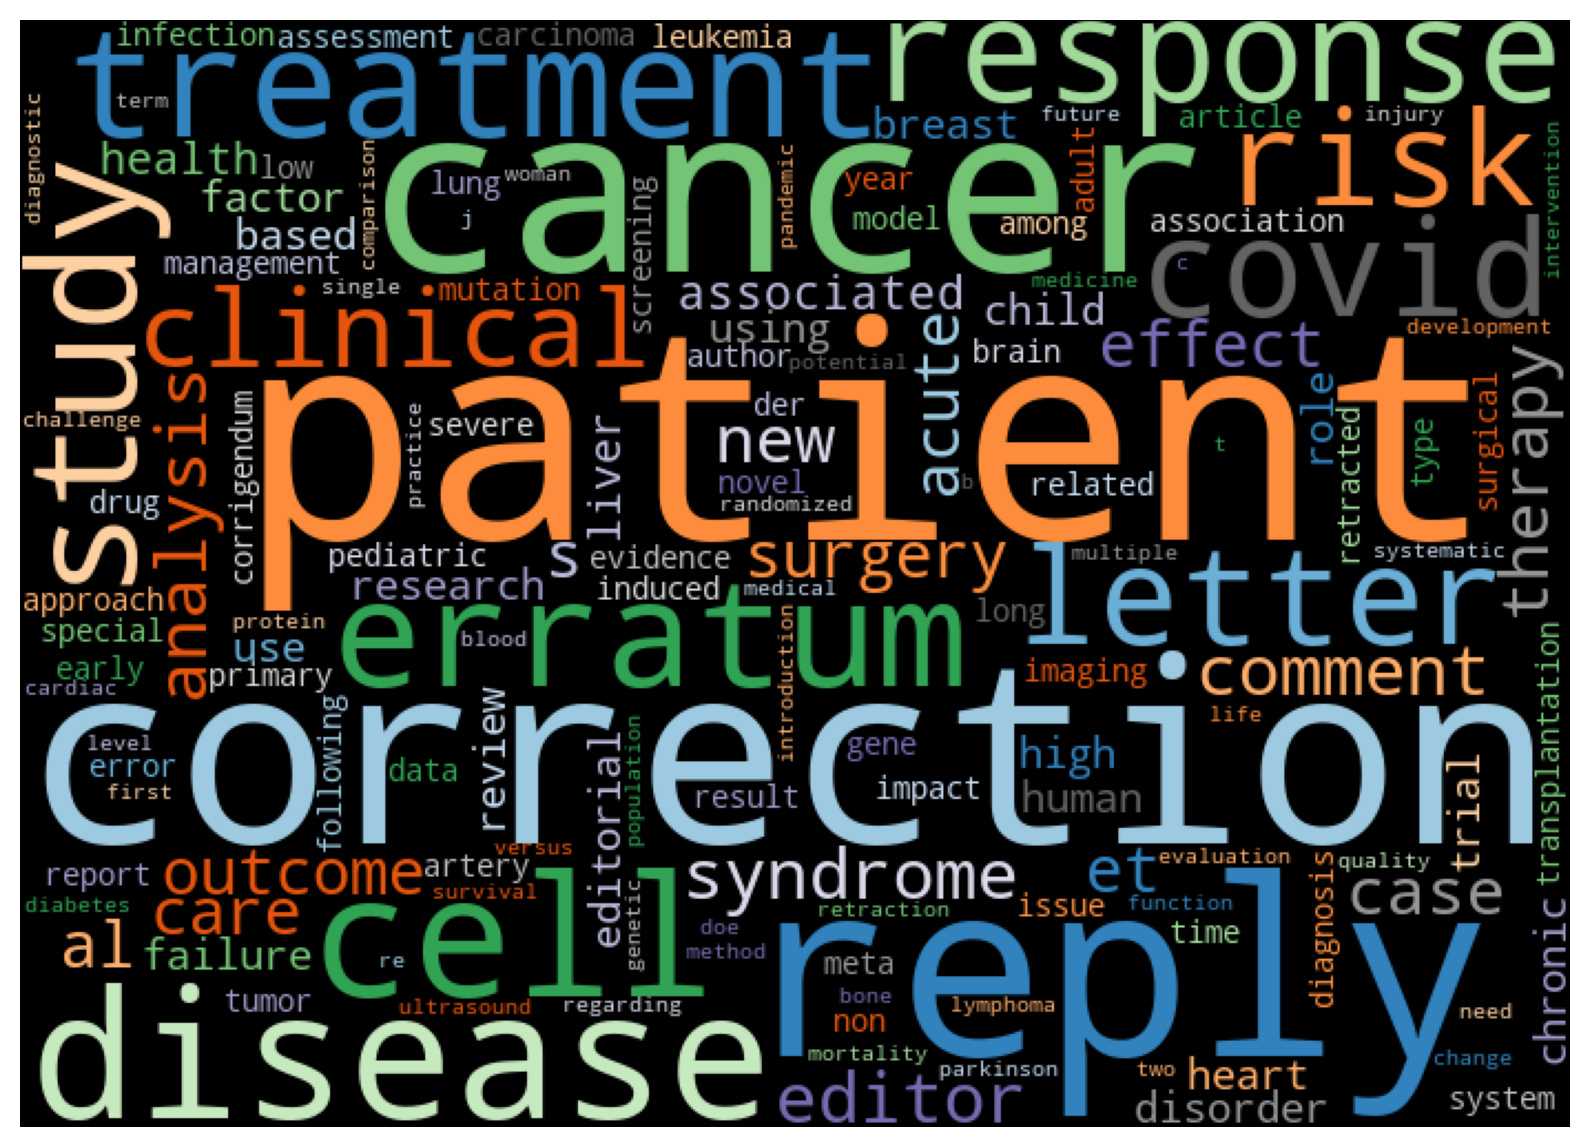

In [21]:
generate_wordcloud(' '.join(df[df.type == 'editorial_discourse']['title_lemmatized']))

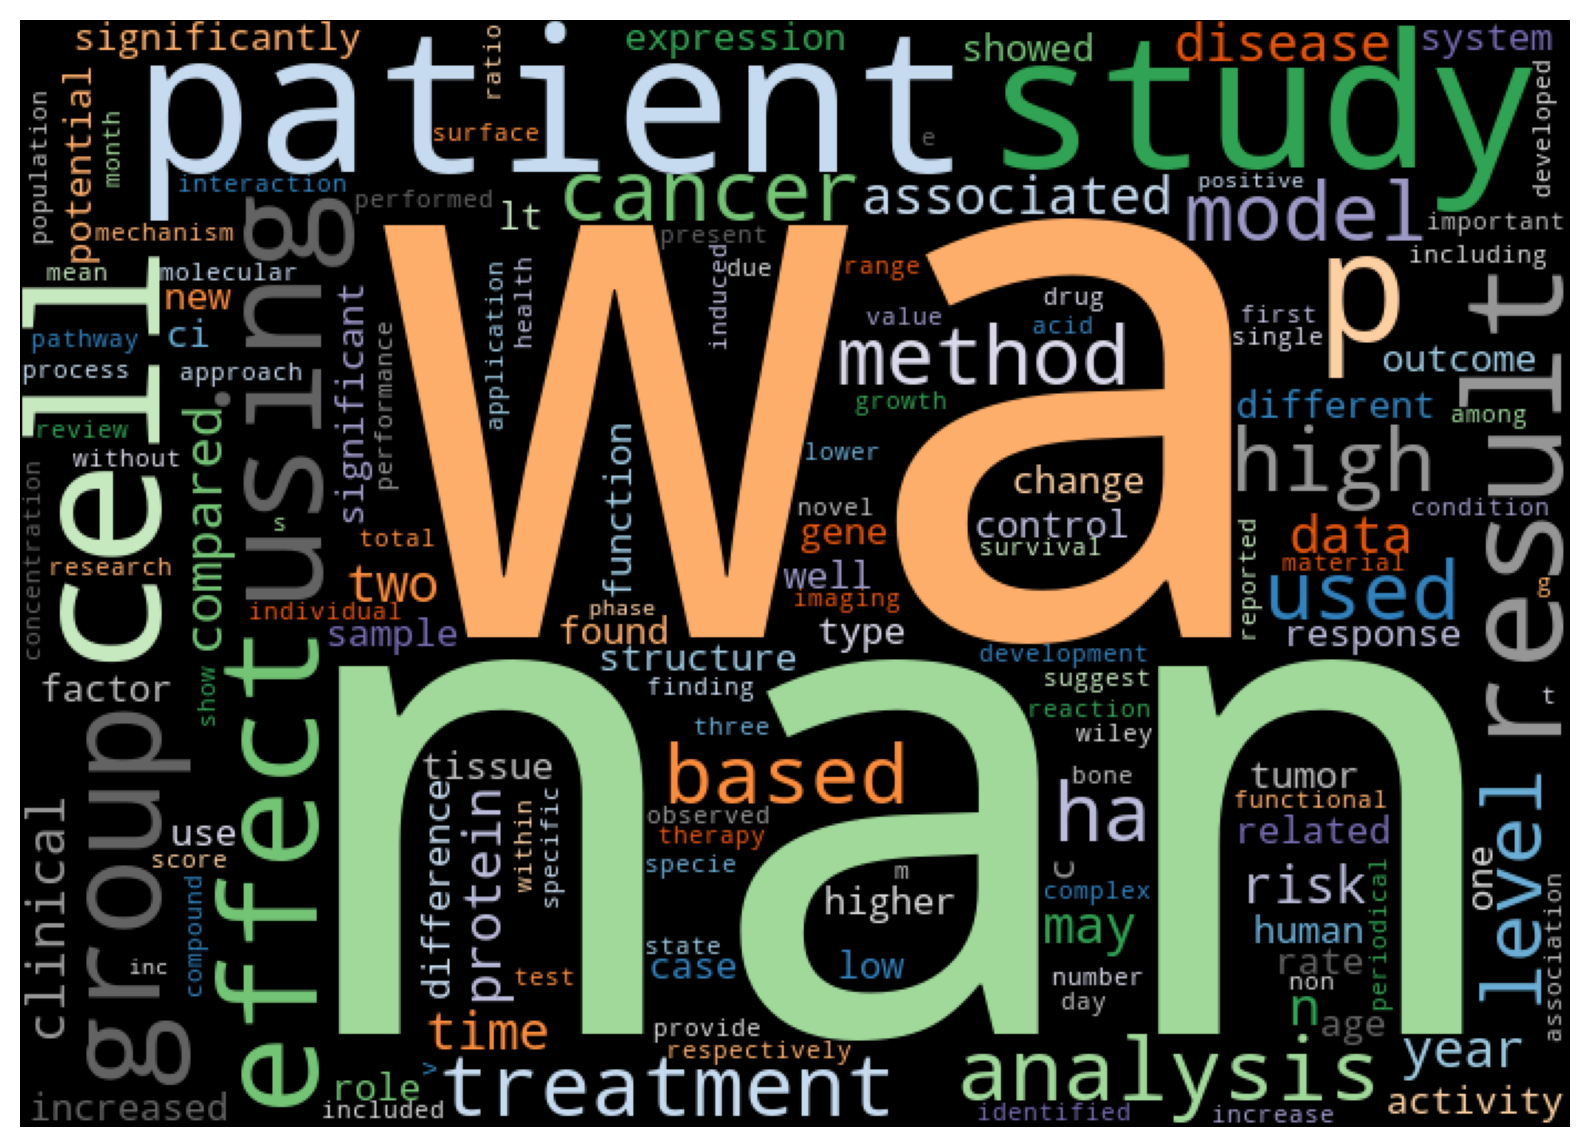

In [22]:
generate_wordcloud(' '.join(df[df.type == 'research_discourse']['abstract_lemmatized']))

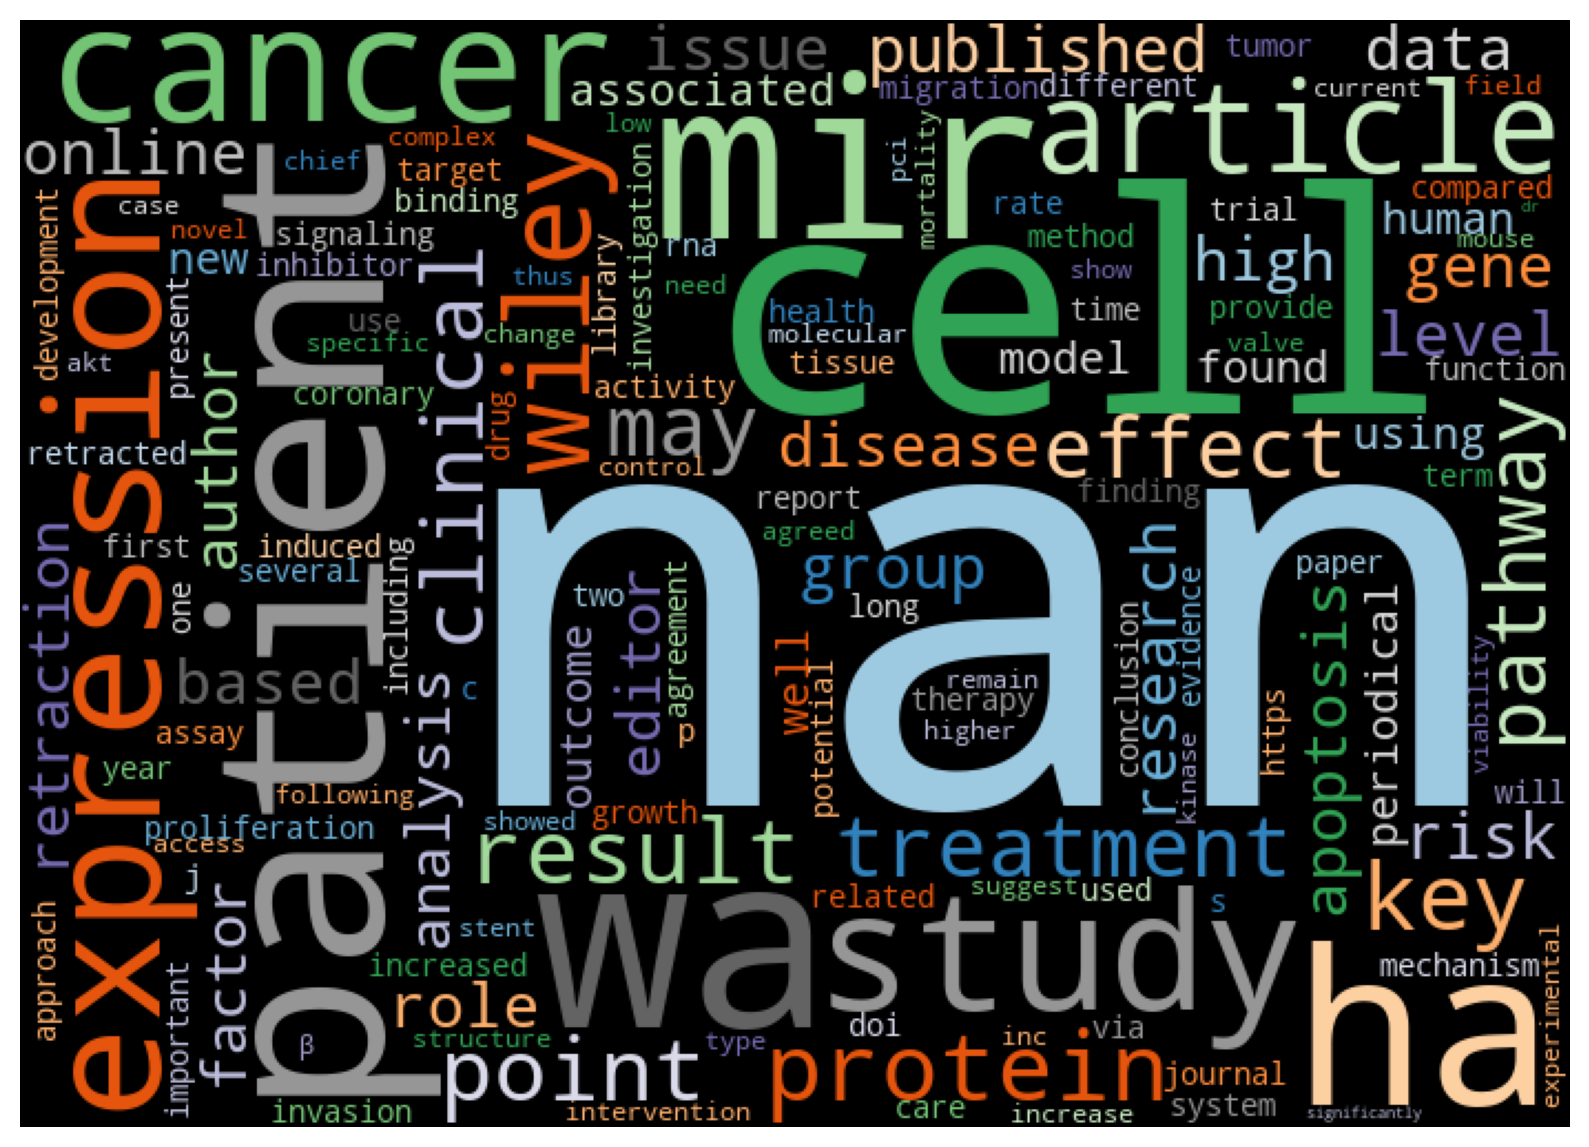

In [23]:
generate_wordcloud(' '.join(df[df.type == 'editorial_discourse']['abstract_lemmatized']))